# Mohammad Amin Rami
# 98101588
# Question 3

Text(0.5, 1.0, 'Speed for each segment')

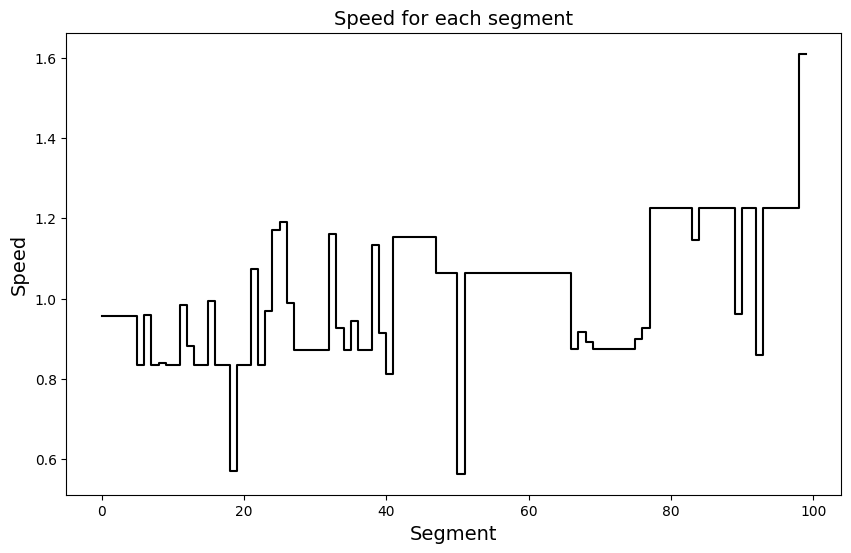

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from veh_speed_sched_data import *

# Setting parameters of question
time = cp.Variable(n)
objective = cp.sum(a * cp.multiply(cp.square(d), cp.inv_pos(time)) + c * time + b * d)

# Setting up the problem for cvxpy
constraints = [tau_min[j] <= cp.sum(time[0:j+1]) for j in range(n)]
constraints += [tau_max[j] >= cp.sum(time[0:j+1]) for j in range(n)]
constraints += [time >= d/smax, time <= d/smin]

# Solution
cp.Problem(cp.Minimize(objective), constraints).solve()
speeds = d/time.value

# Results
plt.figure(figsize=(10,6))
plt.step(range(n),speeds,color = 'black');
plt.xlabel('Segment', size = 14, color ='black')
plt.ylabel('Speed', size = 14, color = 'black')
plt.title('Speed for each segment', size = 14, color = 'black')
